In [14]:
import numpy as np
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    df = dict(npz_file.items())
X = df['overfeat']
y = df['labels']

In [15]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,train_size=4000,test_size=1000,random_state=0,stratify = y)

from Data Exploration notebook, we can see that it requires 163 components to achieve 90% of variance explaination level. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline([
    ('pca', PCA(n_components=163)),
    ('knn', KNeighborsClassifier())
])

In [29]:
from sklearn.model_selection import train_test_split
X_tr_tr,X_tr_valid,y_tr_tr,y_tr_valid = train_test_split(X_tr,y_tr,train_size=3200,test_size=800,random_state=0)

In [44]:
# Define a set of reasonable values
k_values = np.arange(1,30) 
distance_types = [1, 2] # L1, L2 distances

In [45]:
test_scores = []

for k in k_values:
    for d in distance_types:
        pipe.set_params(knn__n_neighbors=k,knn__p=d)
        pipe.fit(X_tr_tr,y_tr_tr)
        accuracy = pipe.score(X_tr_valid, y_tr_valid)
        test_scores.append({
            'n neighbors': k,
            'distance metric': d,
            'validation accuracy': accuracy
        })

In [64]:
import pandas as pd
scores_df = pd.DataFrame(test_scores)
scores_df = scores_df.sort_values(by='validation accuracy',ascending=False)
scores_df.head()

,distance metric,n neighbors,validation accuracy
36,1,19,0.77750
42,1,22,0.77625
40,1,21,0.77500
54,1,28,0.77375
32,1,17,0.77250


In [74]:
a = scores_df.iloc[0]
print('Top accuracy on validation set:', a[2], 'with k:', a[1], 'and distance metric:',a[0])

Top accuracy on validation set: 0.7775 with k: 19.0 and distance metric: 1.0


In [75]:
pipe.set_params(knn__n_neighbors=19,knn__p=1)
pipe.fit(X_tr,y_tr)
pipe.score(X_te,y_te)

0.77

Test set accuracy with tuned parameter is 0.77

Plotting ten nearest neighbors

In [126]:
import random
index_test_one = random.randint(0,1000)
X_te_one = X_te[index_test_one]
y_te_one = y_te[index_test_one]

In [127]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(X_tr,y_tr)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [128]:
distance,index = neigh.kneighbors([X_test_one])

In [129]:
X_pixels = df['pixels']
from sklearn.model_selection import train_test_split
X_pixels_tr,X_pixels_te,y_tr,y_te = train_test_split(X_pixels,y,train_size=4000,test_size=1000,random_state=0,stratify = y)

In [149]:
%matplotlib inline
from matplotlib import pyplot as plt
for i in index:
    flat_img = X_pixels_tr[i,:]

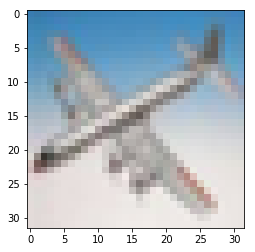

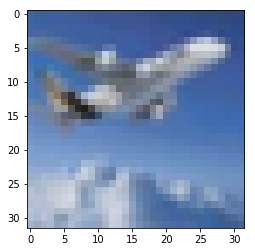

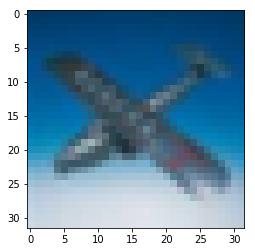

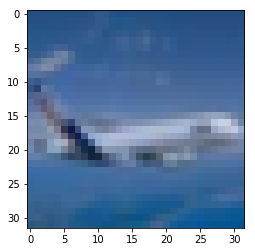

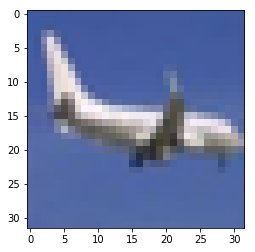

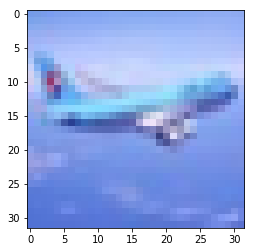

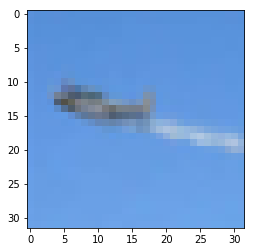

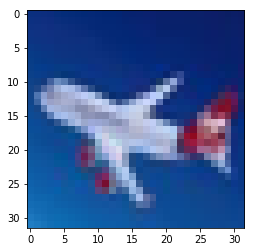

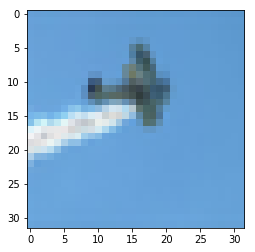

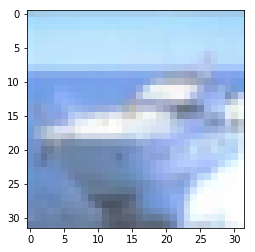

In [150]:
for i in range(10):
    img = flat_img[i,:].reshape(32,32,3)
    plt.imshow(img)
    plt.show()